In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
from calibrate import homography
from vgg_KR_from_P import vgg_KR_from_P

In [ ]:
import matplotlib
matplotlib.use('TkAgg')

In [2]:
left = Image.open('left.jpg');

In [ ]:
plt.imshow(left)
uvBase = plt.ginput(6)

In [12]:
right = Image.open('right.jpg');

In [ ]:
plt.imshow(right)
uvTrans = plt.ginput(6)

In [ ]:
f = open('task2_uvB.txt', 'w')
for t in uvBase:
    line = ' '.join(str(x) for x in t)
    f.write(line + '\n')
f.close()

In [ ]:
f = open('task2_uvT.txt', 'w')
for t in uvTrans:
    line = ' '.join(str(x) for x in t)
    f.write(line + '\n')
f.close()

In [3]:
with open('task2_uvT.txt') as f:
    uvTrans = [list(map(float, i.strip().split())) for i in f]

In [4]:
with open('task2_uvB.txt') as f:
    uvBase = [list(map(float, i.strip().split())) for i in f]

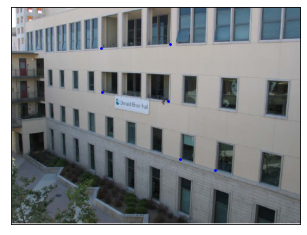

In [13]:
fig = plt.imshow(left)
plt.scatter(uvBase[:, 0], uvBase[:, 1], c='b', s=3)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task2myout1.png")

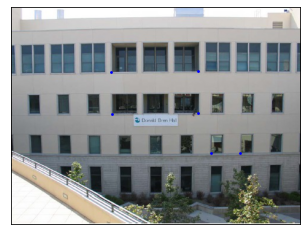

In [14]:
fig = plt.imshow(right)
plt.scatter(uvTrans[:, 0], uvTrans[:, 1], c='b', s=3)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task2myout2.png")

In [5]:
uvTrans = np.asarray(uvTrans)
uvBase = np.asarray(uvBase)

In [6]:
uvTrans

array([[170.90565825, 110.17568302],
       [317.98297788, 109.02664146],
       [171.48017903, 181.41625971],
       [318.55749866, 180.26721815],
       [339.81476751, 248.63519095],
       [390.37259614, 248.06067017]])

In [ ]:
def project_H(u2Trans, v2Trans, uBase, vBase):
    # Get H matrix
    H = homography(u2Trans, v2Trans, uBase, vBase)
    
    xy = np.vstack((uBase, vBase))
    uv = np.vstack((u2Trans, u2Trans))
    uv_p = np.dot(H, np.concatenate((xy, np.ones((1, xy.shape[1]))), axis=0))
    uv_p = uv_p / uv_p[2, :]
    uv_p = uv_p[0:2, :]
    uv_p = uv_p.T
    print(uv_p)
    
    return H

In [7]:
H = homography(uvTrans[:, 0], uvTrans[:, 1], uvBase[:, 0], uvBase[:, 1])
H

array([[-1.38546620e-02,  1.16519660e-04,  9.99363733e-01],
       [-2.18686777e-03, -6.05934975e-03,  3.19765040e-02],
       [-1.71030487e-05,  9.38712367e-07, -4.02100362e-03]])

In [9]:
uvTrans

array([[170.90565825, 110.17568302],
       [317.98297788, 109.02664146],
       [171.48017903, 181.41625971],
       [318.55749866, 180.26721815],
       [339.81476751, 248.63519095],
       [390.37259614, 248.06067017]])

In [8]:
uvBase

array([[153.67003486,  69.95922843],
       [269.72323238,  62.4904583 ],
       [154.24455564, 144.64692981],
       [267.42514926, 159.0099493 ],
       [288.10789733, 258.97656499],
       [347.85805843, 277.36122994]])

In [10]:
import cv2
dst = cv2.warpPerspective(np.array(left), H, (left.size[0], left.size[1]))

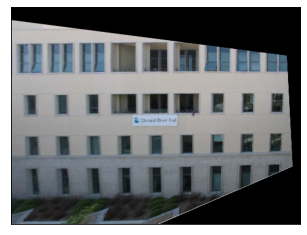

In [15]:
fig = plt.imshow(dst)

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("Task2out.png")